In [1]:
# BAGGING

In [2]:
# 📥 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 📂 Load the dataset
data = pd.read_csv('sers.csv')  # Replace if your path is different

# 🔵 Handle categorical variables
data = pd.get_dummies(data, drop_first=True)

# 🎯 Split features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# ✂️ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Scale the features
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

# 🌳 Define and train Bagging Regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

# 🔮 Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# 📈 Evaluate the model
r2_bagging = r2_score(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))

# 🖨️ Print results
print("📈 Bagging Regressor Performance:")
print(f"R² Score: {r2_bagging:.4f}")
print(f"MAE: {mae_bagging:.4f}")
print(f"RMSE: {rmse_bagging:.4f}")

📈 Bagging Regressor Performance:
R² Score: 0.8376
MAE: 0.0083
RMSE: 0.0520


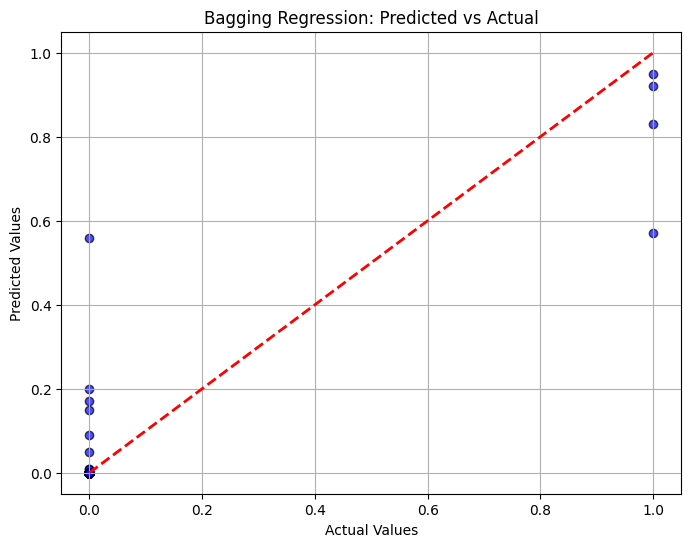

In [3]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bagging, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bagging Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [4]:
# RANDOM FOREST REGRESSION

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('sers.csv')  # Ensure the file is in the same directory

# Convert categorical variables using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop(columns=['Conc'])  # Adjust if your column name is different
y = df['Conc']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("📈 Random Forest Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

📈 Random Forest Regression Performance:
R² Score: 1.0000
MAE: 50.9979
RMSE: 341.4244


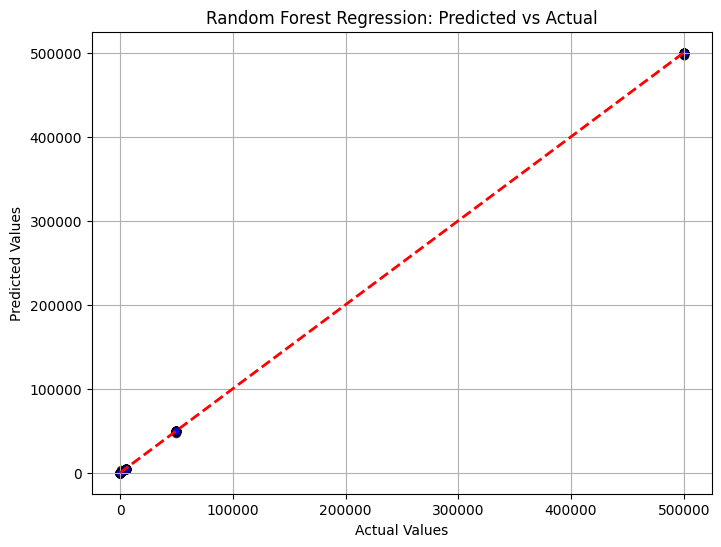

In [6]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.grid(True)
plt.show()